#Data Visualisation on Cinema Company Sales

---



The first step is to import all necessary libraries.

In [ ]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import hvplot.pandas
import holoviews as hv
from statsmodels.tsa.seasonal import seasonal_decompose

All the datasets are loaded as dataframes and then merged or segmented as per requirement.

In [ ]:
customer_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001333060/CinemaWeeklyVisitors.csv', index_col=0)
customer_data.head()

,BKK,WBK,TVJ,SJE,TPY,SDT,UDD,XWO,AKA,UVQ,...,YKT,BWF,CCX,XEZ,CWN,JJQ,VPG,VJV,RPQ,WKL
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0,504,306,359,436,0,304,179,0,357,...,163,159,0,165,0,111,858,1001,361,121
2019-01-08,0,512,272,304,431,0,271,179,0,396,...,180,177,0,167,0,126,1064,1087,285,101
2019-01-15,0,445,304,312,444,0,264,176,0,368,...,159,169,0,174,0,145,1049,875,312,129
2019-01-22,0,504,260,349,447,0,413,177,0,437,...,174,179,0,173,0,164,970,943,276,135
2019-01-29,0,499,323,323,432,0,312,191,0,482,...,164,176,0,174,0,148,916,848,308,114


In [ ]:
cin_age = pd.read_csv('https://tinyurl.com/ChrisCoDV/001333060/CinemaAge.csv', index_col=0)
cin_age.head()

,Avg age (yrs)
Id,
BKK,30
WBK,26
TVJ,36
SJE,28
TPY,31


In [ ]:
cin_cap = pd.read_csv('https://tinyurl.com/ChrisCoDV/001333060/CinemaCapacity.csv', index_col=0)
cin_cap.head()

,Seating capacity
Id,
BKK,30
WBK,346
TVJ,175
SJE,176
TPY,279


In [ ]:
cin_mark = pd.read_csv('https://tinyurl.com/ChrisCoDV/001333060/CinemaMarketing.csv', index_col=0)
cin_mark.head()

,Marketing (£000s)
Id,
BKK,2
WBK,16
TVJ,5
SJE,8
TPY,15


In [ ]:
cin_over = pd.read_csv('https://tinyurl.com/ChrisCoDV/001333060/CinemaOverheads.csv', index_col=0)
cin_over.head()

,Overheads (£000s)
Id,
BKK,56
WBK,33
TVJ,22
SJE,72
TPY,84


In [ ]:
cin_spend = pd.read_csv('https://tinyurl.com/ChrisCoDV/001333060/CinemaSpend.csv', index_col=0)
cin_spend.head()

,Avg spend (£)
Id,
BKK,10
WBK,13
TVJ,14
SJE,9
TPY,11


The summary data is compilation of all datasets at a common index that is the cinema names.


In [ ]:
SummaryData = pd.DataFrame(index=customer_data.columns)
SummaryData['Visits'] = customer_data.sum().values
SummaryData['Age'] = cin_age.values
SummaryData['Capacity'] = cin_cap.values
SummaryData['Marketing'] = cin_mark.values
SummaryData['Overhead'] = cin_over.values
SummaryData['Spend'] = cin_spend.values
print(SummaryData.head())

     Visits  Age  Capacity  Marketing  Overhead  Spend
BKK   12954   30        30          2        56     10
WBK  100080   26       346         16        33     13
TVJ   61265   36       175          5        22     14
SJE   67855   28       176          8        72      9
TPY   91634   31       279         15        84     11


A list of colours is created so as to assign different colours for high, medium and low-volume cinemas. It is appended and looped through the code for plot.

In [ ]:
colours = []
for name in customer_data.columns:
    total_visits = customer_data[name].sum()
    if total_visits > 150000:
        colour = 'pink'
    elif total_visits > 50000:
        colour = 'darkviolet'
    elif total_visits < 50000:
        colour = 'yellow'
    colours.append(colour)

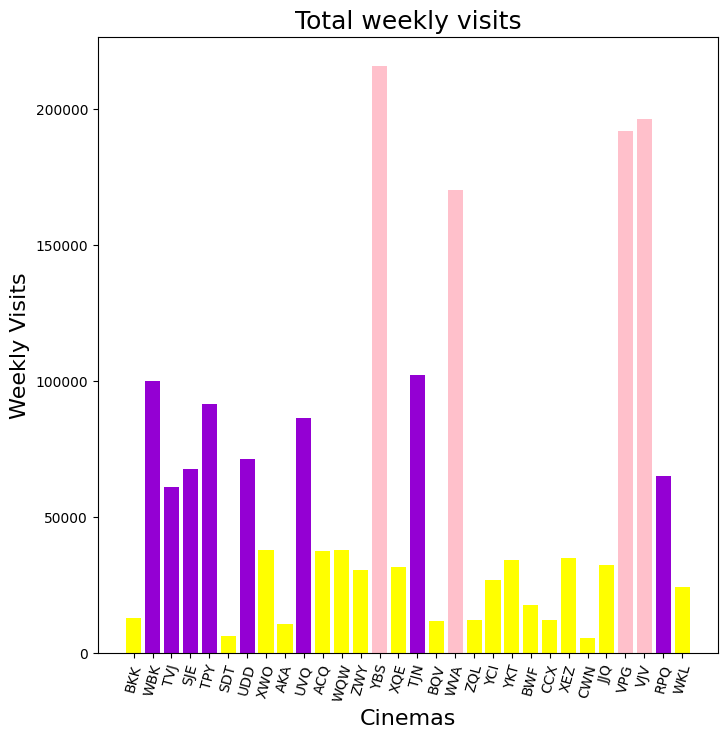

In [ ]:
#Weekly total visits to the cinemas

plt.figure(figsize=(8,8))
x_pos = np.arange(len(customer_data.columns))
plt.bar(x_pos, customer_data.sum(), align='center', color = colours)
plt.xticks(x_pos, customer_data.columns, rotation=75)
plt.xlabel('Cinemas', fontsize=16)
plt.ylabel('Weekly Visits', fontsize=16)
plt.title('Total weekly visits', fontsize=18)
plt.show()

There is another method without having to colour code the data. We can arrange in ascending order which will give us high, medium and low volume cinemas.

In [ ]:
customer_data = customer_data.reindex(customer_data.sum().sort_values(ascending=False).index, axis=1)

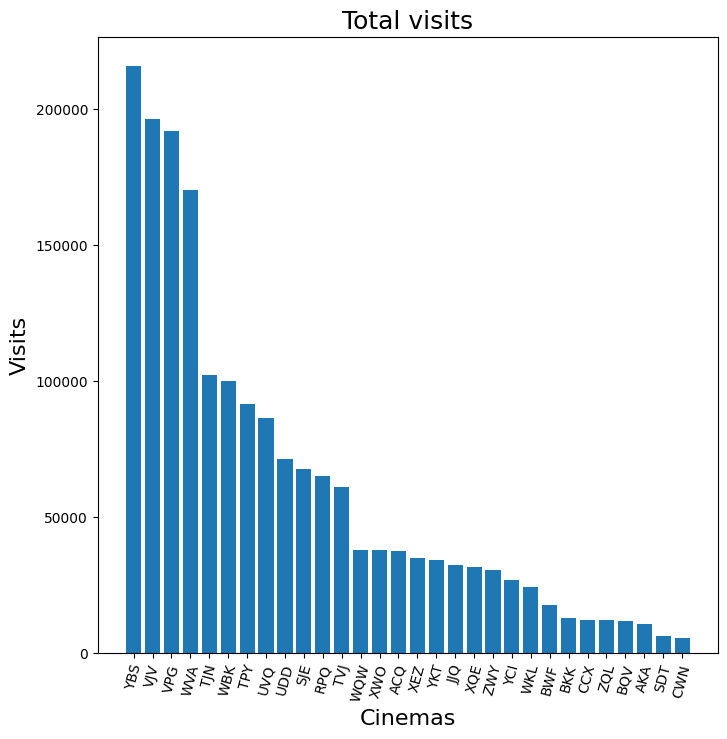

In [ ]:
##Weekly total visits to the cinemas

plt.figure(figsize=(8,8))
x_pos = np.arange(len(customer_data.columns))
plt.bar(x_pos, customer_data.sum(), align='center')
plt.xticks(x_pos, customer_data.columns, rotation=75)
plt.xlabel('Cinemas', fontsize=16)
plt.ylabel('Visits', fontsize=16)
plt.title('Total visits', fontsize=18)
plt.show()

In [ ]:
pd.plotting.register_matplotlib_converters()
customer_data.index = pd.to_datetime(customer_data.index)

Line plot for High Volume cinemas, created in interactive visualisation mode. This enables zoom, box zoom, hover and other tools.

             YBS   VJV   VPG   WVA
Date                              
2019-01-01  1015  1001   858   686
2019-01-08  1245  1087  1064  1056
2019-01-15   897   875  1049   745
2019-01-22  1068   943   970   842
2019-01-29   988   848   916   716


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
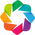

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [ ]:
##High Volume Cinemas line plot

selected = ['YBS', 'VJV', 'VPG', 'WVA']
print(customer_data[selected].head())

plot = customer_data[selected].hvplot.line(
    frame_height=500, frame_width=800,
    xlabel='Date', ylabel='Visits',
    ylim =(200,None),
    title='High Volume Cinemas'
)
hv.extension('bokeh')
plot

Line plot for High Volume cinemas in normal visualisation.

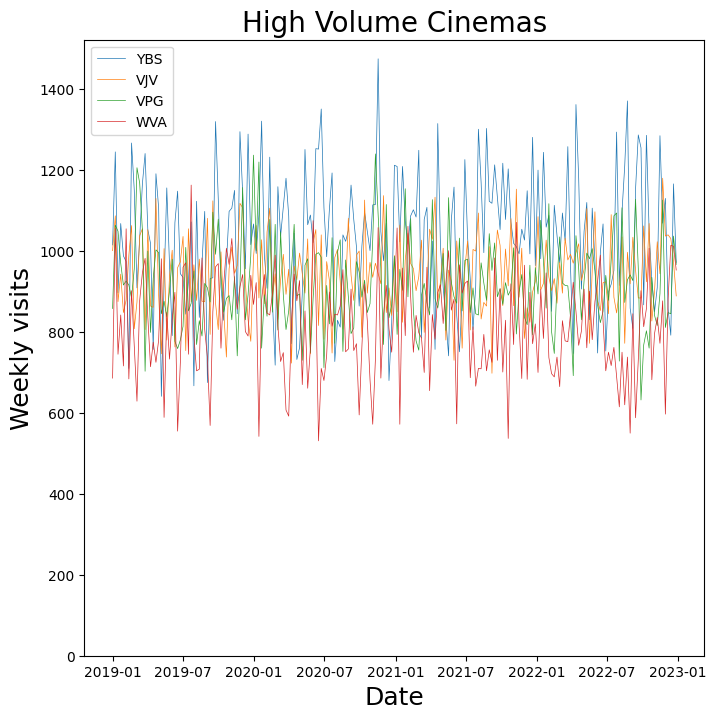

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(customer_data[selected], linewidth=0.5)
plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Weekly visits', fontsize=18)
plt.title('High Volume Cinemas', fontsize=20)
plt.legend(selected, loc=2)
plt.show()

High volume cinemas with monthly averaged visits.

                YBS     VJV      VPG     WVA
Date                                        
2019-01-31  1042.60  950.80   971.40  809.00
2019-02-28  1025.50  935.00   920.50  851.25
2019-03-31  1086.75  943.25  1032.25  858.75
2019-04-30  1025.20  959.60   946.20  766.20
2019-05-31   921.00  867.25   865.25  787.75


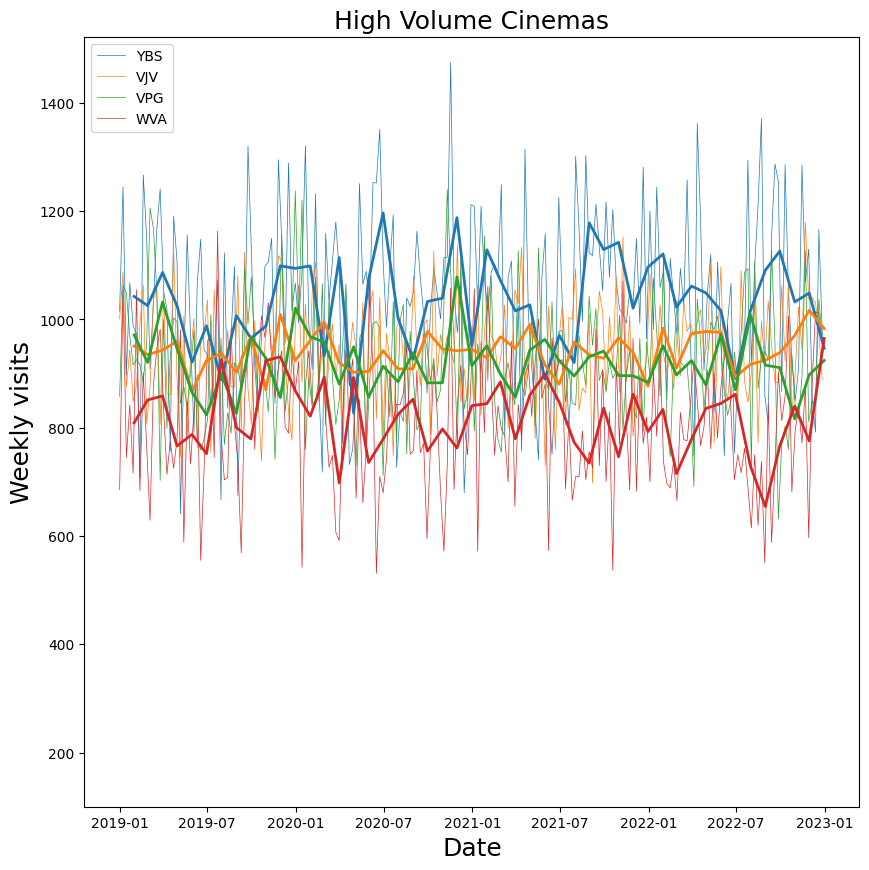

In [ ]:
sample_rate = 'M'  # monthly
averaged_data = customer_data.resample(sample_rate).mean()
print(averaged_data[selected].head())

plt.figure(figsize=(10, 10))
plt.plot(customer_data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
plt.plot(averaged_data[selected], linewidth=2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Weekly visits', fontsize=18)
plt.ylim(ymin=100)
plt.title('High Volume Cinemas', fontsize=18)
plt.legend(selected, loc=2)
plt.show()

High Volume Cinemas with 14-day Rolling Average

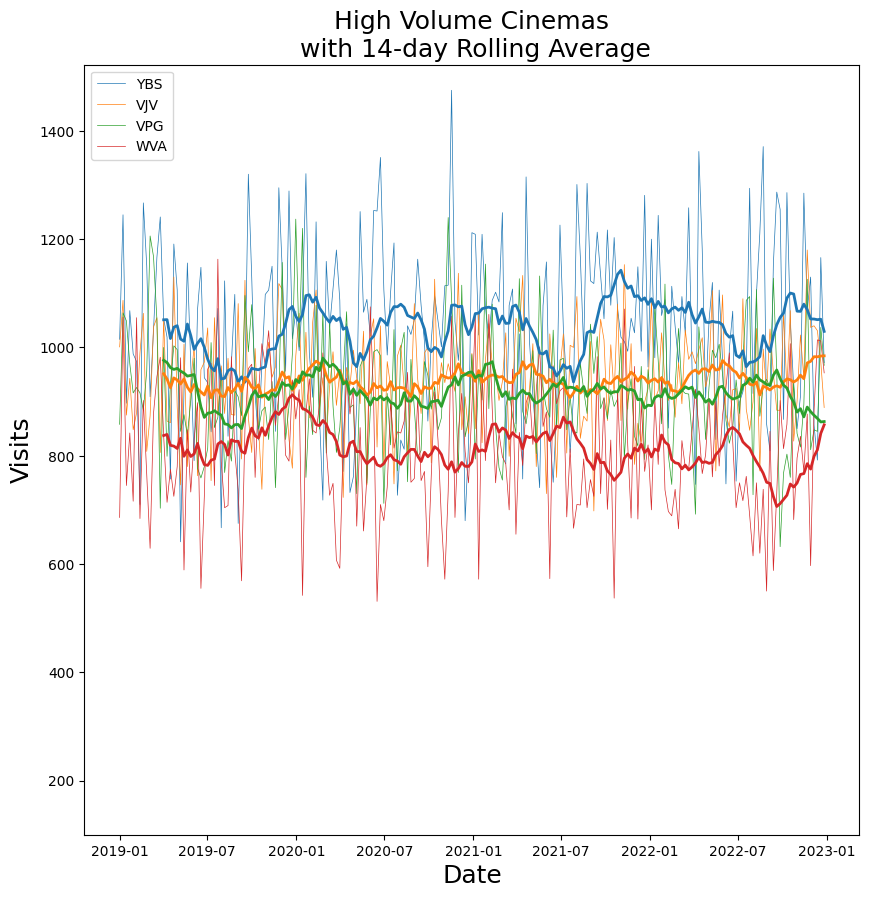

In [ ]:
period = 14
rolling_average = customer_data.rolling(window=period).mean()

plt.figure(figsize=(10,10))
plt.plot(customer_data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
plt.plot(rolling_average[selected], linewidth=2)
plt.ylim(ymin=100)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Visits', fontsize=18)
plt.title('High Volume Cinemas\n with 14-day Rolling Average', fontsize=18)
plt.legend(selected, loc=2)
plt.show()

High Volume Cinemas with 14-day Rolling Average and cubic trendline

             YBS   VJV   VPG   WVA
Date                              
2019-01-01  1015  1001   858   686
2019-01-08  1245  1087  1064  1056
2019-01-15   897   875  1049   745
2019-01-22  1068   943   970   842
2019-01-29   988   848   916   716


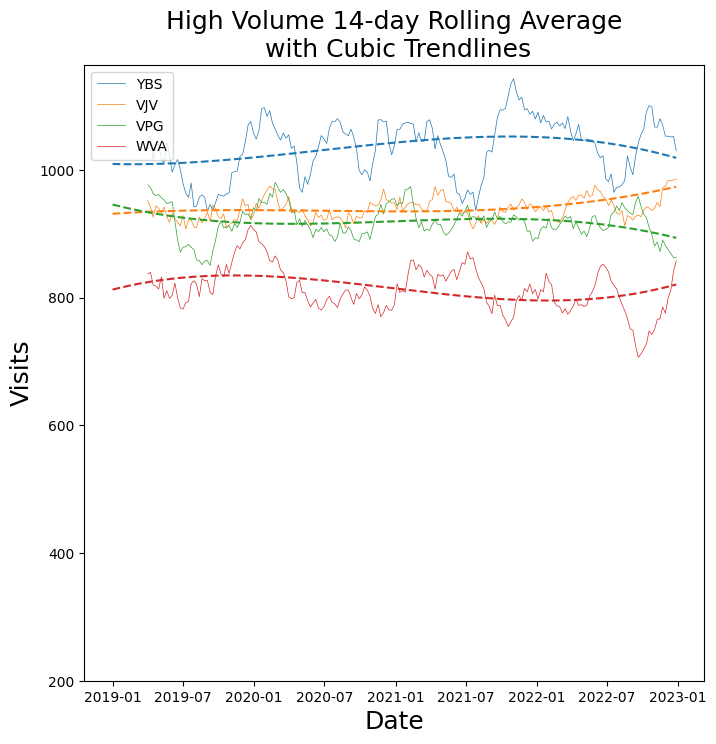

In [ ]:
sample_rate = 'SM'  # weekly
averaged_data = customer_data.resample(sample_rate).mean()
period = 14
rolling_average = customer_data.rolling(window=period).mean()

print(customer_data[selected].head())

plt.figure(figsize=(8, 8))
plt.plot(rolling_average[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
for name in selected:
    x = np.arange(len(customer_data[name]))
    z = np.polyfit(x, customer_data[name], 3)
    trend = np.poly1d(z)
    plt.plot(customer_data.index, trend(x), linestyle='--')
plt.ylim(ymin=200)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Visits', fontsize=18)
plt.title('High Volume 14-day Rolling Average\n with Cubic Trendlines', fontsize=18)
plt.legend(selected, loc=2)
plt.show()

Another segment, the medium volume cinemas is created.

In [ ]:
selected_med = ['TJN', 'WBK', 'TPY', 'UVQ', 'UDD', 'SJE', 'RPQ', 'TVJ']
print(customer_data[selected_med].head())

            TJN  WBK  TPY  UVQ  UDD  SJE  RPQ  TVJ
Date                                              
2019-01-01  420  504  436  357  304  359  361  306
2019-01-08  340  512  431  396  271  304  285  272
2019-01-15  514  445  444  368  264  312  312  304
2019-01-22  660  504  447  437  413  349  276  260
2019-01-29  452  499  432  482  312  323  308  323


Medium Volume Cinemas with Average

               TJN     WBK    TPY     UVQ     UDD     SJE     RPQ     TVJ
Date                                                                     
2019-01-31  477.20  492.80  438.0  408.00  312.80  329.40  308.40  293.00
2019-02-28  498.25  446.00  441.0  427.75  382.75  301.75  297.50  312.00
2019-03-31  486.50  482.50  430.5  389.50  377.25  273.75  304.25  270.50
2019-04-30  452.60  488.20  430.6  453.60  341.00  328.80  291.20  289.20
2019-05-31  517.50  537.75  429.5  391.25  324.75  308.75  282.75  280.75


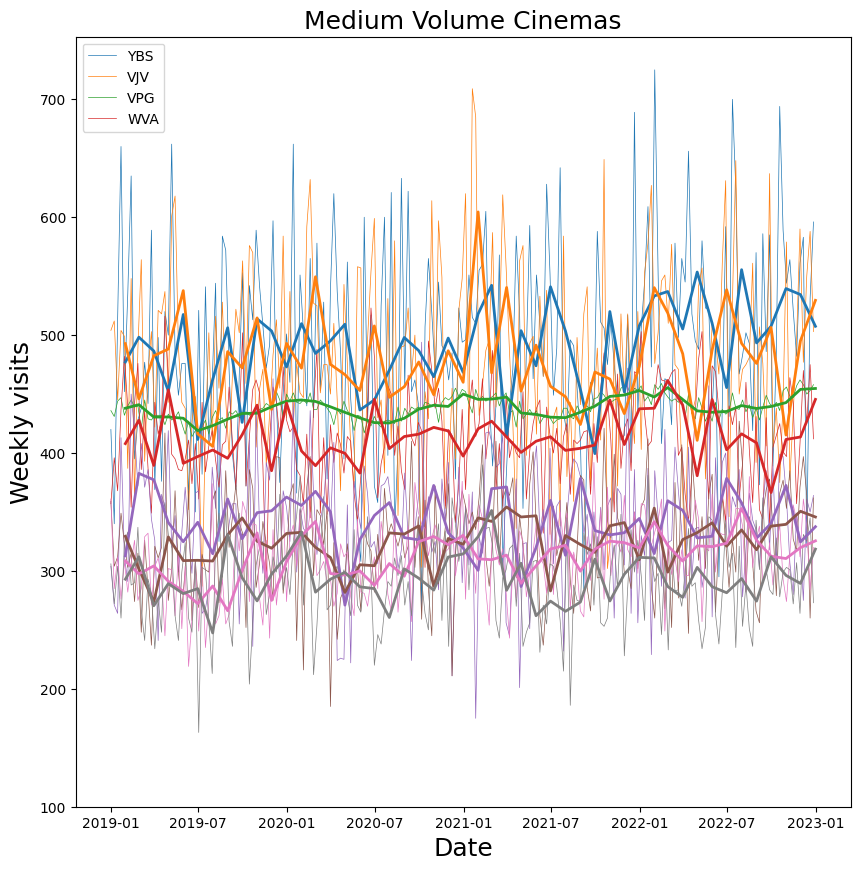

In [ ]:
sample_rate = 'M'  # monthly
averaged_data = customer_data.resample(sample_rate).mean()
print(averaged_data[selected_med].head())

plt.figure(figsize=(10, 10))
plt.plot(customer_data[selected_med], linewidth=0.5)
plt.gca().set_prop_cycle(None)
plt.plot(averaged_data[selected_med], linewidth=2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Weekly visits', fontsize=18)
plt.ylim(ymin=100)
plt.title('Medium Volume Cinemas', fontsize=18)
plt.legend(selected, loc=2)
plt.show()

Medium Volume Cinemas with 14-day Rolling Average and trendline

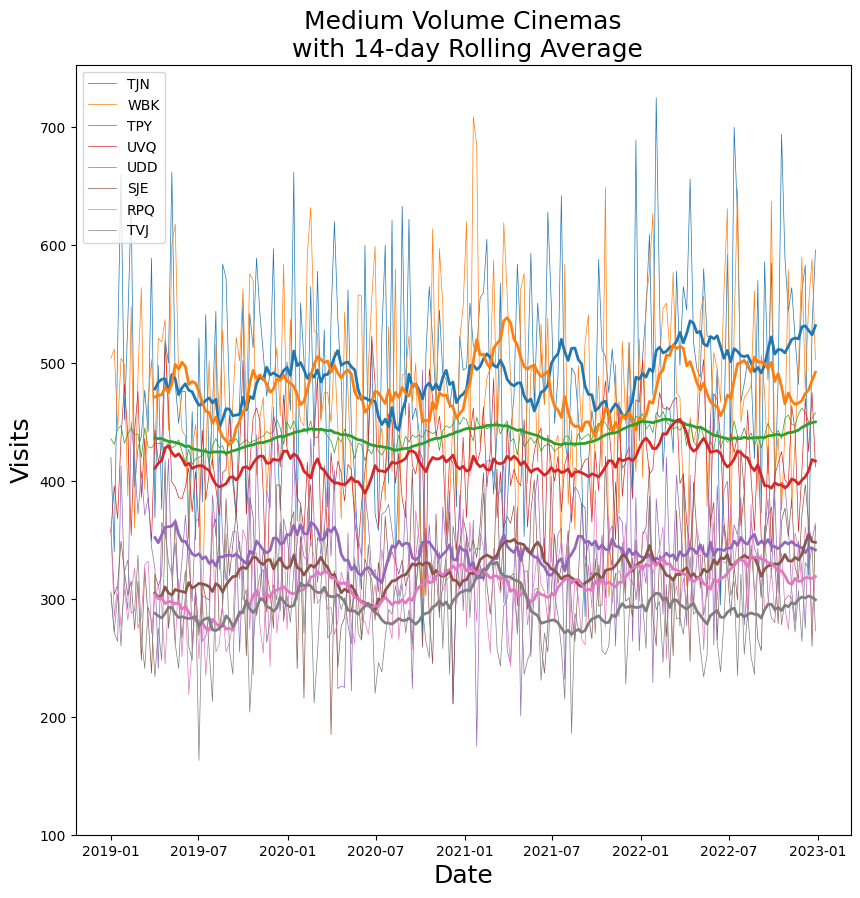

In [ ]:
period = 14
rolling_average = customer_data.rolling(window=period).mean()

plt.figure(figsize=(10,10))
plt.plot(customer_data[selected_med], linewidth=0.5)
plt.gca().set_prop_cycle(None)
plt.plot(rolling_average[selected_med], linewidth=2)
plt.ylim(ymin=100)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Visits', fontsize=18)
plt.title('Medium Volume Cinemas\n with 14-day Rolling Average', fontsize=18)
plt.legend(selected_med, loc=2)
plt.show()

Medium Volume 14-day Rolling Average with Cubic Trendlines

            TJN  WBK  TPY  UVQ  UDD  SJE  RPQ  TVJ
Date                                              
2019-01-01  420  504  436  357  304  359  361  306
2019-01-08  340  512  431  396  271  304  285  272
2019-01-15  514  445  444  368  264  312  312  304
2019-01-22  660  504  447  437  413  349  276  260
2019-01-29  452  499  432  482  312  323  308  323


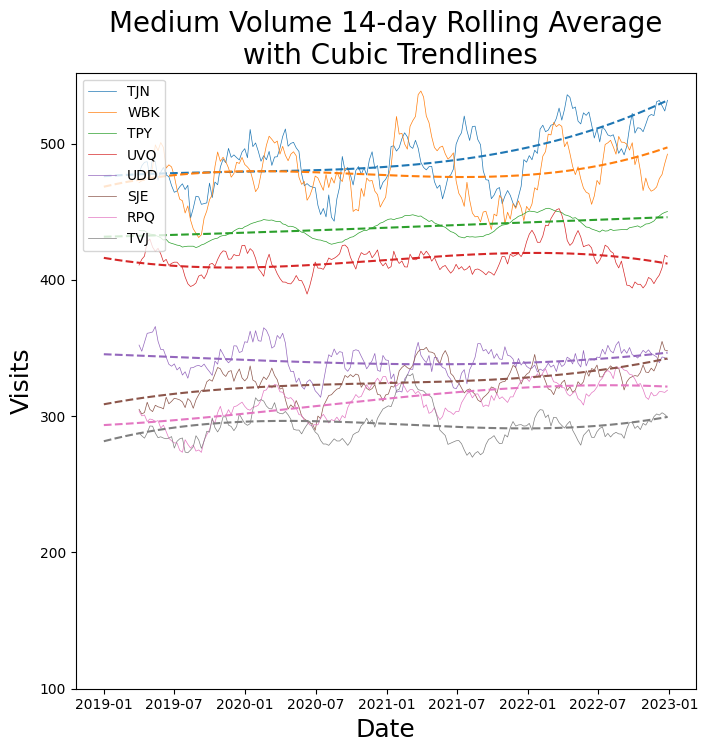

In [ ]:
sample_rate = 'SM'  # weekly
averaged_data = customer_data.resample(sample_rate).mean()
period = 14
rolling_average = customer_data.rolling(window=period).mean()

print(customer_data[selected_med].head())

plt.figure(figsize=(8, 8))
plt.plot(rolling_average[selected_med], linewidth=0.5)
plt.gca().set_prop_cycle(None)
for name in selected_med:
    x = np.arange(len(customer_data[name]))
    z = np.polyfit(x, customer_data[name], 3)
    trend = np.poly1d(z)
    plt.plot(customer_data.index, trend(x), linestyle='--')
plt.ylim(ymin=100)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Visits', fontsize=18)
plt.title('Medium Volume 14-day Rolling Average\n with Cubic Trendlines', fontsize=20)
plt.legend(selected_med, loc=2)
plt.show()

To create the data frame for low volume cinemas simply drop the selected high and medium volume ones from total data. We are left with all low volume cinemas.

In [ ]:
data = pd.merge(customer_data[selected], customer_data[selected_med], left_index=True, right_index=True)

data_low = customer_data.drop(data, axis=1)

data_low.head()

,WQW,XWO,ACQ,XEZ,YKT,JJQ,XQE,ZWY,YCI,WKL,BWF,BKK,CCX,ZQL,BQV,AKA,SDT,CWN
Date,,,,,,,,,,,,,,,,,,
2019-01-01,182,179,164,165,163,111,150,159,131,121,159,0,0,114,0,0,0,0
2019-01-08,174,179,189,167,180,126,165,168,131,101,177,0,0,132,0,0,0,0
2019-01-15,172,176,152,174,159,145,147,155,137,129,169,0,0,116,0,0,0,0
2019-01-22,175,177,145,173,174,164,166,150,131,135,179,0,0,137,0,0,0,0
2019-01-29,178,191,215,174,164,148,153,150,132,114,176,0,0,106,0,0,0,0


In [ ]:
data_low.index = pd.to_datetime(data_low.index)

Low Volume Cinemas with Trendlines

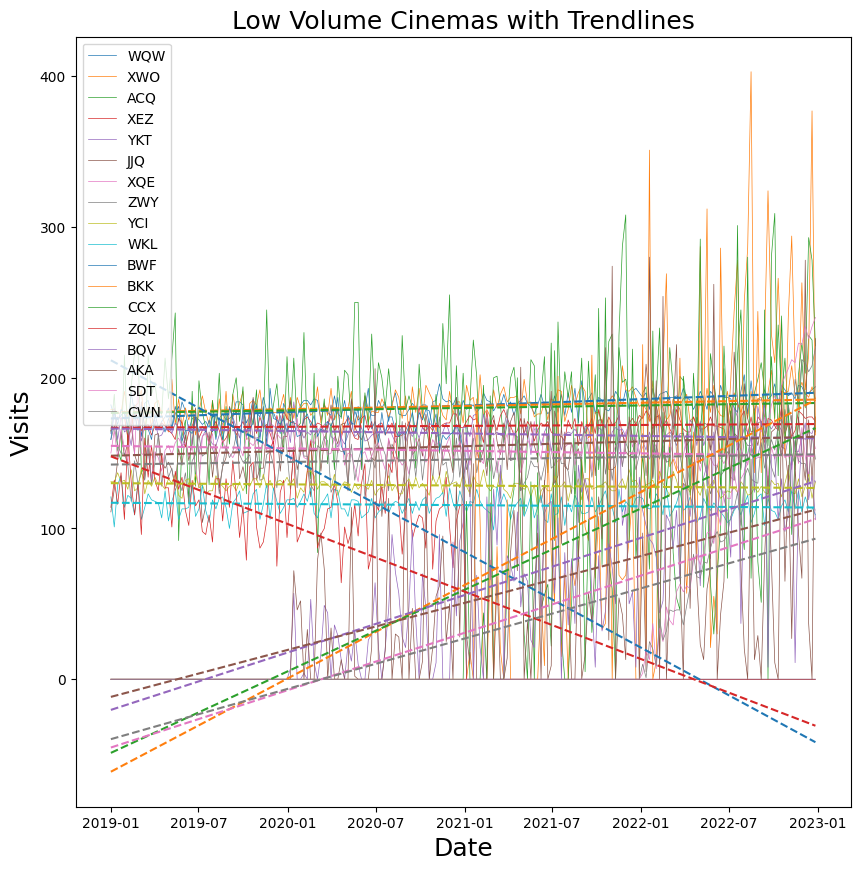

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(data_low, linewidth=0.5)
plt.gca().set_prop_cycle(None)
for name in data_low:
    x = np.arange(len(data_low[name]))
    z = np.polyfit(x, data_low[name], 1)
    trend = np.poly1d(z)
    plt.plot(data_low.index, trend(x), linestyle='--')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Visits', fontsize=18)
plt.title('Low Volume Cinemas with Trendlines', fontsize=18)
plt.legend(data_low, loc=2)
plt.show()

Description of Summary data

In [ ]:
SummaryData.describe()

,Visits,Age,Capacity,Marketing,Overhead,Spend
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,61281.100000,35.966667,161.766667,7.133333,51.666667,16.433333
std,60068.818981,5.839717,164.943393,8.067531,24.793399,4.789956
min,5590.000000,26.000000,30.000000,1.000000,13.000000,9.000000
25%,19343.750000,31.000000,39.000000,2.000000,31.250000,13.000000
50%,36367.500000,37.000000,88.500000,3.500000,49.000000,15.000000
75%,82770.500000,41.000000,203.750000,8.000000,72.750000,19.750000
max,215861.000000,45.000000,606.000000,34.000000,96.000000,26.000000


Heatmap of Summary Data

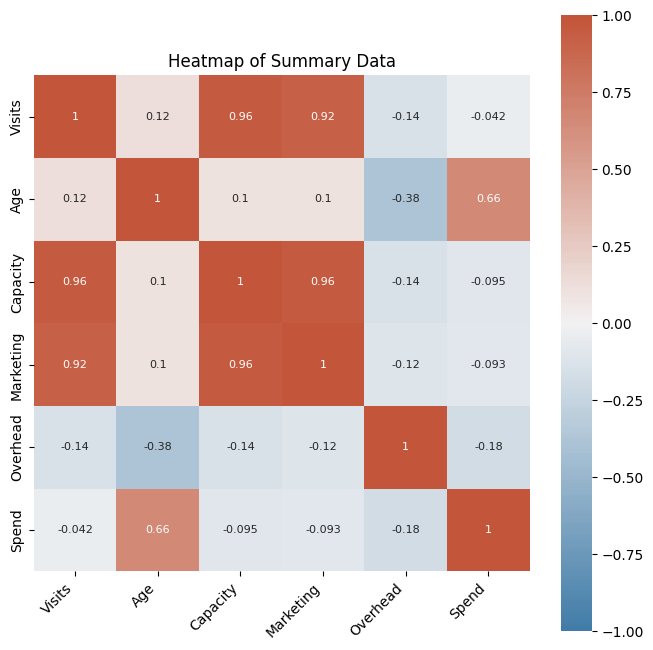

In [ ]:
plt.figure(figsize=(8, 8))
corr = SummaryData.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(240, 20, n=300), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Heatmap of Summary Data')
plt.show()

Scatter plots of Marketing spend vs Capacity, Visits vs Capacity, and Marketing spend vs Visits

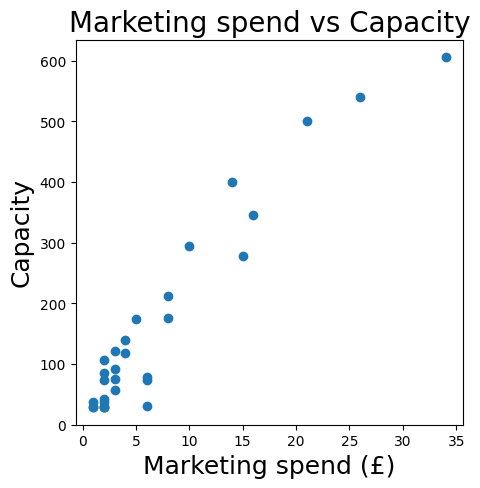

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(SummaryData['Marketing'], SummaryData['Capacity'])
plt.title('Marketing spend vs Capacity', fontsize=20)
plt.xlabel('Marketing spend (£)', fontsize=18)
plt.ylim(ymin=0)
plt.ylabel('Capacity', fontsize=18)
plt.show()


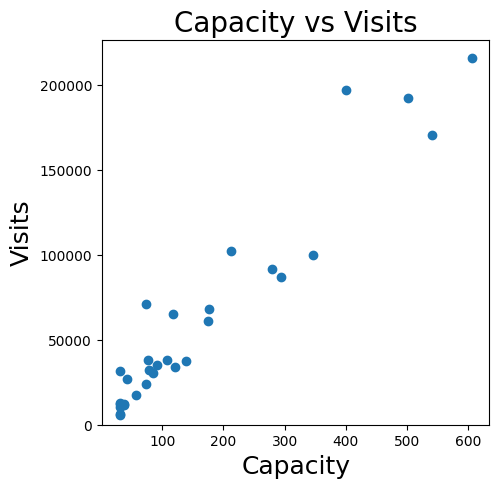

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(SummaryData['Capacity'], SummaryData['Visits'])
plt.title('Capacity vs Visits', fontsize=20)
plt.xlabel('Capacity', fontsize=18)
plt.ylim(ymin=0)
plt.ylabel('Visits', fontsize=18)
plt.show()

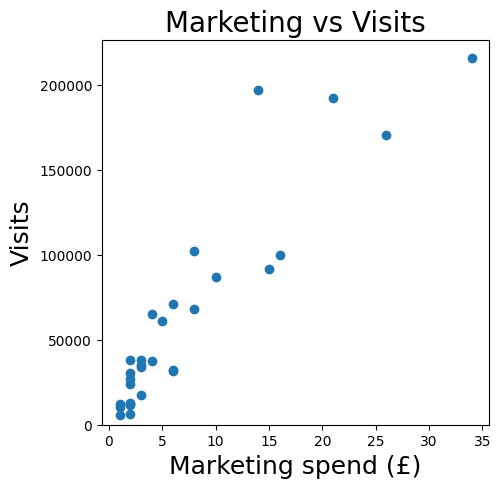

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(SummaryData['Marketing'], SummaryData['Visits'])
plt.title('Marketing vs Visits', fontsize=20)
plt.xlabel('Marketing spend (£)', fontsize=18)
plt.ylim(ymin=0)
plt.ylabel('Visits', fontsize=18)
plt.show()

In [ ]:
summary_data_high = SummaryData.loc[customer_data.sum() > 150000]
summary_data_medium = SummaryData.loc[(customer_data.sum() > 50000)
                                     & (customer_data.sum() <= 150000)]
summary_data_low = SummaryData.loc[customer_data.sum() < 50000]

Scatter plot of Marketing per cinema vs Capacity per cinema according to high, medium and low volume datasets.

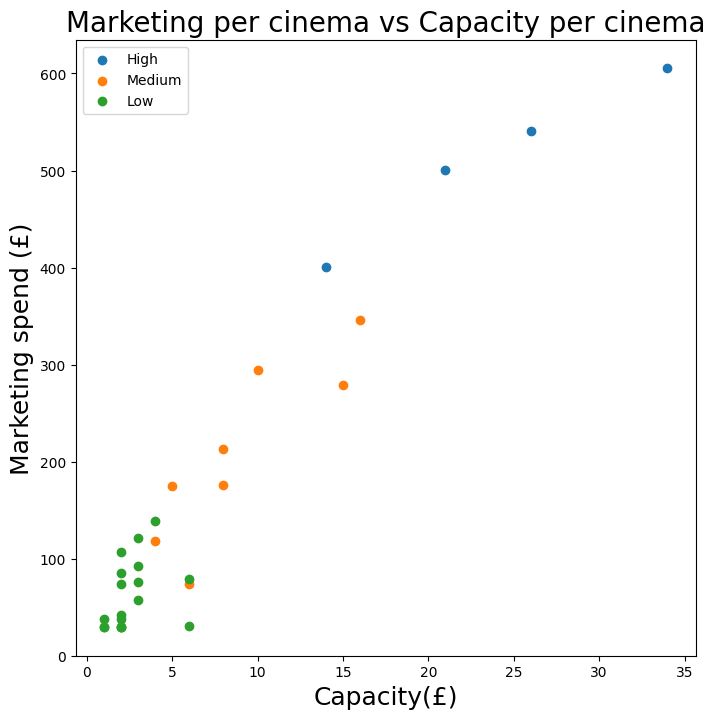

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(summary_data_high['Marketing'], summary_data_high['Capacity'])
plt.scatter(summary_data_medium['Marketing'], summary_data_medium['Capacity'])
plt.scatter(summary_data_low['Marketing'], summary_data_low['Capacity'])
plt.ylim(ymin=0)
plt.title('Marketing per cinema vs Capacity per cinema', fontsize=20)
plt.xlabel('Capacity(£)', fontsize=18)
plt.ylabel('Marketing spend (£)', fontsize=18)
plt.legend(['High', 'Medium', 'Low'], loc=2)
plt.show()

High volume cinemas subplot histograms

50 bins


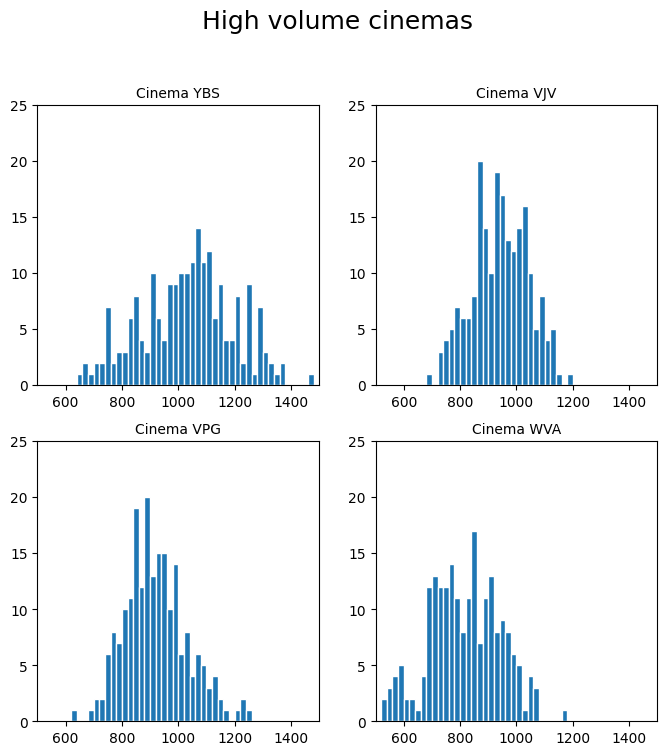

In [ ]:
x_min = 500
x_max = 1500
bin_width = 20

n_bins = int((x_max - x_min) / bin_width)
print(f'{n_bins} bins')
bins = [(x_min + x * bin_width) for x in range(n_bins + 1)]

fig = plt.figure(figsize=(8, 8))
fig.suptitle('High volume cinemas', fontsize=18, position=(0.5, 1.0))
counter = 1
for name in selected:
    sub = fig.add_subplot(2, 2, counter)
    sub.hist(customer_data[name], bins, edgecolor='w')
    sub.set_title('Cinema ' + name, fontsize=10)
    sub.set_xlim(xmin=x_min, xmax=x_max)
    sub.set_ylim(ymin=0, ymax=25)
    counter += 1
# plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
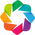

/usr/local/lib/python3.10/dist-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  layout_plot = gridplot(
/usr/local/lib/python3.10/dist-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  layout_plot = gridplot(


:Layout
   .Scatter.I   :Scatter   [Marketing]   (Visits)
   .Scatter.II  :Scatter   [Capacity]   (Visits)
   .Scatter.III :Scatter   [Marketing]   (Capacity)

In [ ]:
xlimits = (0, 230)
ylimits = (0, 120)
plot = SummaryData.hvplot.scatter(
    frame_height=300, frame_width=300,
    x='Marketing', y='Visits', title='Marketing vs Visits',
    xlim=xlimits, ylim=ylimits, size=10
) + \
SummaryData.hvplot.scatter(
    frame_height=300, frame_width=300,
    x='Capacity', y='Visits', title='Capacity vs Visits',
    xlim=xlimits, ylim=ylimits, size=10
) + \
SummaryData.hvplot.scatter(
    frame_height=300, frame_width=300,
    x='Marketing', y='Capacity', title='Marketing vs Capacity',
    xlim=xlimits, ylim=ylimits, size=10
)
hv.extension('bokeh')
plot

Autocorrelation Plots for total volume of cinemas

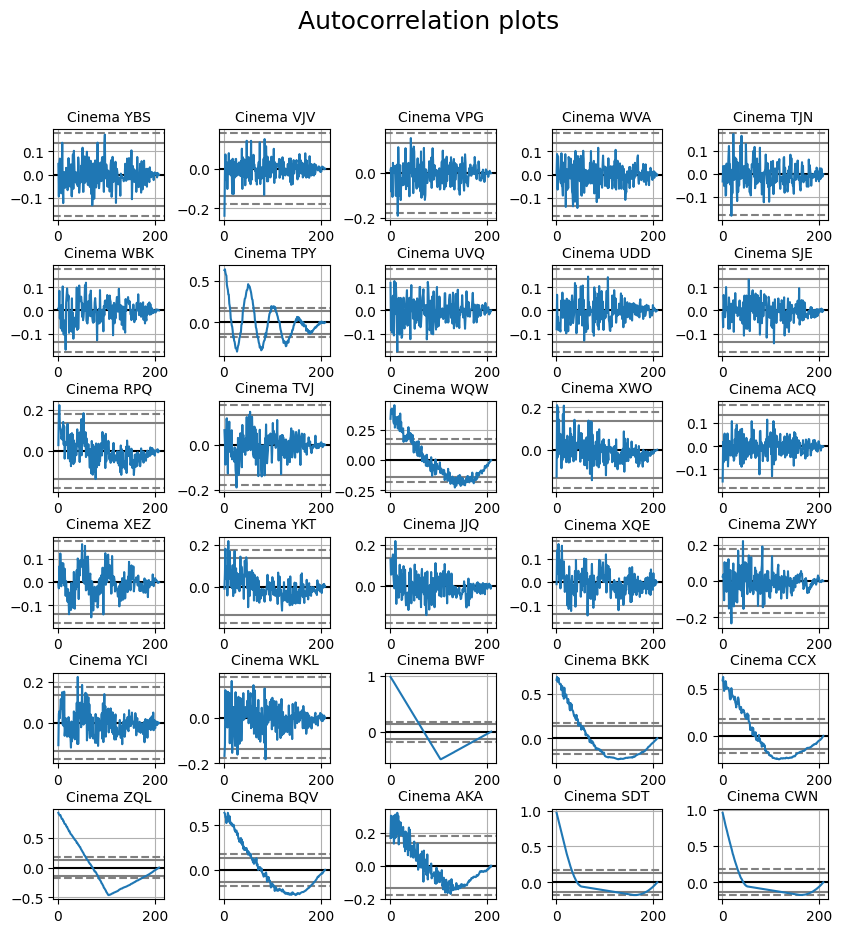

In [ ]:
row = 0
col = 0
fig, axes = plt.subplots(figsize=(10, 10), nrows=6, ncols=5)
fig.suptitle('Autocorrelation plots', fontsize=18, position=(0.5, 1.0))
for name in customer_data.columns:
    sub = pd.plotting.autocorrelation_plot(customer_data[name], axes[row, col])
    sub.set_title('Cinema ' + name, fontsize=10)
    sub.xaxis.label.set_visible(False)
    sub.yaxis.label.set_visible(False)
    col += 1
    if col == 5:
        row += 1
        col = 0
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

Decomposition over a period of 14 days for selected cinemas

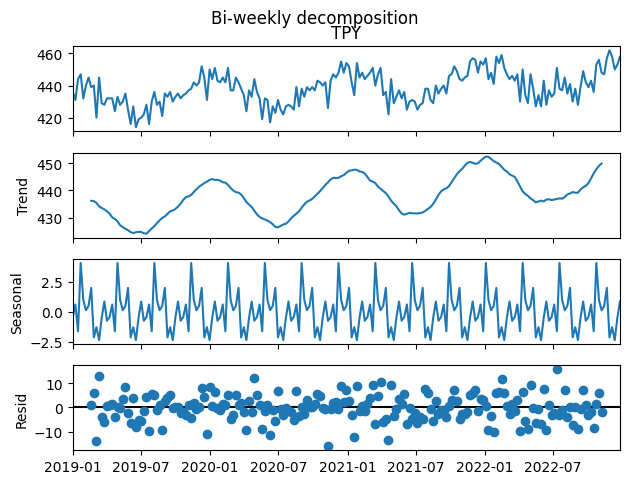

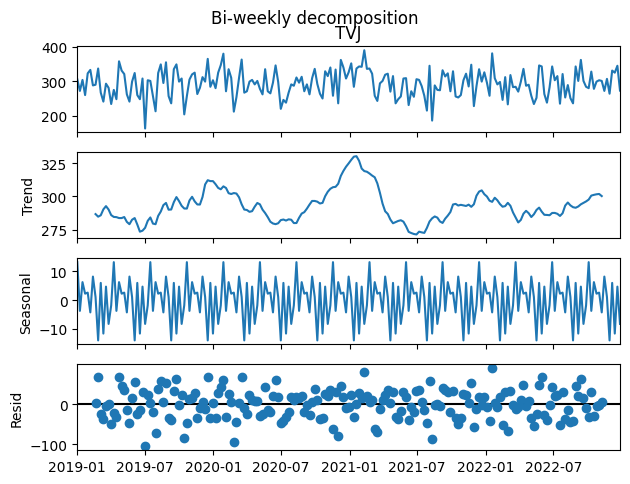

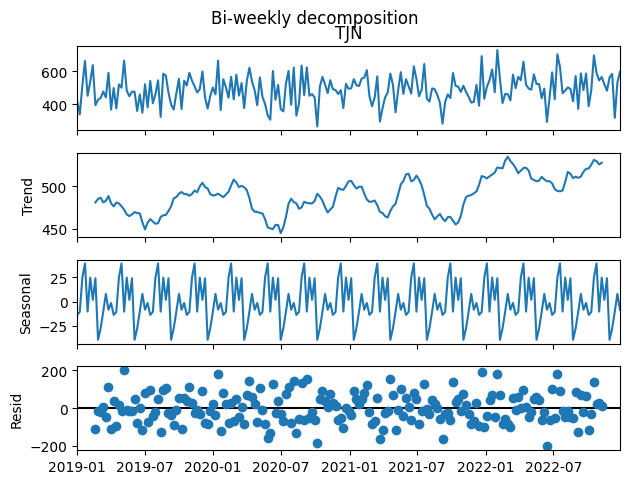

In [ ]:
selected_1 = ['TPY','TVJ','TJN']
for name in selected_1:
    result = seasonal_decompose(customer_data[name], model='additive', period=14)
    result.plot()
    plt.suptitle('Bi-weekly decomposition',
        position=(0.5, 1.0))
    plt.show()